# Clustering on Pycaret

Imports

In [2]:
import pandas as pd

# Dataset from zillow api 

* Dataset was cleaned in [EDA.ipynb]('EDA.ipynb')
* cook county IL filtered
* Values = mean price change over time
* index = neighborhoods (cook county IL only!!)
* columns = time = (YYYY/MM/DD) min=2000-01-31 / max=2022-02-28
* in this test we will test `chicago` individially as a beta test and determine the value of continuing with this method

In [3]:
#import dataset
data = pd.read_csv('./MLDatasets/clusterML.csv')

In [5]:
data = data.drop('Unnamed: 0',axis=1)

In [6]:
data

,Longitude,Latitude,SalePrice,total_tax,annual_insurance,annual_maintenance
0,-88.139859,42.152685,575000.0,6900.152425,3072.046129,14377.222425
1,-88.137325,42.152623,550000.0,5782.857888,2938.478906,13752.175888
2,-88.140675,42.152142,575000.0,6933.140308,3072.046129,14377.228308
3,-88.135220,42.152024,1150000.0,10741.840686,6144.092258,28752.128686
4,-88.133998,42.152193,455000.0,6191.409642,2430.923459,11377.109642
...,...,...,...,...,...,...
32145,-87.554121,41.480706,129900.0,2342.510544,694.015291,3247.184544
32146,-87.547609,41.484348,53235.0,1745.147771,284.418045,1330.460771
32147,-87.547597,41.482516,47500.0,1318.982982,253.777724,1187.064982
32148,-87.547821,41.482515,139500.0,1112.125939,745.305104,3487.069939


In [5]:
from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,session_id,1187
1,Original Data,"(32605, 24)"
2,Missing Values,False
3,Numeric Features,17
4,Categorical Features,7
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(32605, 50)"
9,CPU Jobs,-1


In [6]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1365,4288.9593,2.0248,0,0,0


In [7]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1187, tol=0.0001, verbose=0)


In [8]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

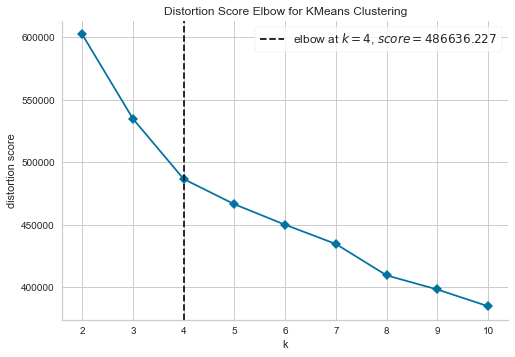

In [9]:
plot_model(kmeans, plot = 'elbow')

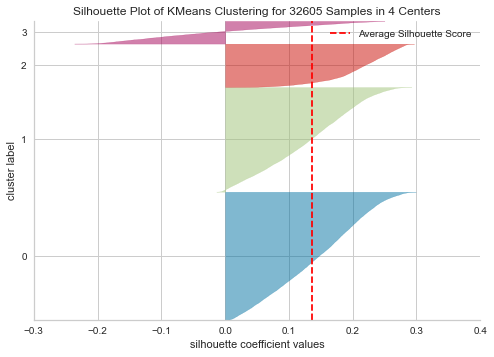

In [10]:
plot_model(kmeans, plot = 'silhouette')

In [11]:
result = assign_model(kmeans)
result.head()

,TownCode,LocationFactor,Land_SquareFeet,Land_PriorTaxYearMarketValueEstimate,Building_SquareFeet,Building_PriorTaxYearMarketValueEstimate,SalePrice,Age,WallMaterial,RoofMaterial,...,CentralHeating,CentralAir,AtticType,HalfBaths,Garage1Size,Garage1Material,Garage1Attachment,Garage1Area,Porch,Cluster
0,10,2.222425,6600,31350.0,2232.0,468500.0,575000.0,93,3.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,3,Cluster 1
1,10,2.175888,6534,31030.0,2092.0,387860.0,550000.0,110,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,1,Cluster 0
2,10,2.228308,8712,41380.0,2244.0,460860.0,575000.0,115,1.0,1.0,...,2.0,1.0,1.0,0.0,3.0,1.0,2.0,2.0,1,Cluster 0
3,10,2.128686,8747,41540.0,3965.0,736700.0,1150000.0,12,1.0,1.0,...,1.0,1.0,3.0,1.0,4.0,1.0,2.0,2.0,3,Cluster 3
4,10,2.109642,8712,41380.0,2725.0,407120.0,455000.0,136,1.0,1.0,...,2.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,3,Cluster 1


In [12]:
predictions = predict_model(kmeans, data = data)
predictions.head()

,TownCode,LocationFactor,Land_SquareFeet,Land_PriorTaxYearMarketValueEstimate,Building_SquareFeet,Building_PriorTaxYearMarketValueEstimate,SalePrice,Age,WallMaterial,RoofMaterial,...,CentralHeating,CentralAir,AtticType,HalfBaths,Garage1Size,Garage1Material,Garage1Attachment,Garage1Area,Porch,Cluster
0,10,2.222425,6600,31350.0,2232.0,468500.0,575000.0,93,3.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,3,Cluster 1
1,10,2.175888,6534,31030.0,2092.0,387860.0,550000.0,110,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,1,Cluster 0
2,10,2.228308,8712,41380.0,2244.0,460860.0,575000.0,115,1.0,1.0,...,2.0,1.0,1.0,0.0,3.0,1.0,2.0,2.0,1,Cluster 0
3,10,2.128686,8747,41540.0,3965.0,736700.0,1150000.0,12,1.0,1.0,...,1.0,1.0,3.0,1.0,4.0,1.0,2.0,2.0,3,Cluster 3
4,10,2.109642,8712,41380.0,2725.0,407120.0,455000.0,136,1.0,1.0,...,2.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,3,Cluster 1


In [13]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [14]:
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['